In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# Congressional Member Vote Averages
trump_score_data = "https://projects.fivethirtyeight.com/congress-tracker-data/csv/averages.csv"

In [39]:
ts = pd.read_csv(trump_score_data)
ts["party"] = ts["party"].replace({
    "Republican": "R",
    "Democrat": "D",
    "Independent": "I"
})
ts.head()

,congress,chamber,bioguide,last_name,state,district,party,votes,agree_pct,predicted_agree,net_trump_vote
0,0,house,A000055,Aderholt,AL,4.0,R,117,0.974359,0.954279,63.0
1,115,house,A000055,Aderholt,AL,4.0,R,95,0.968421,0.946349,63.0
2,116,house,A000055,Aderholt,AL,4.0,R,22,1.000000,0.988520,63.0
3,0,house,A000367,Amash,MI,3.0,R,115,0.600000,0.803687,9.4
4,115,house,A000367,Amash,MI,3.0,R,96,0.541667,0.847386,9.4


In [30]:
ts[(ts["state"]=="CA") & (ts["district"]==45)]

,congress,chamber,bioguide,last_name,state,district,party,votes,agree_pct,predicted_agree,net_trump_vote
1020,0,house,P000618,Porter,CA,45.0,D,22,0.000000,0.061348,-5.4
1021,116,house,P000618,Porter,CA,45.0,D,22,0.000000,0.061348,-5.4
1373,0,house,W000820,Walters,CA,45.0,R,94,0.989362,0.578442,-5.4
1374,115,house,W000820,Walters,CA,45.0,R,94,0.989362,0.578442,-5.4


In [35]:
ts[(ts["state"]=="CA") & (ts["district"]==45) & (ts["congress"]==116)]

,congress,chamber,bioguide,last_name,state,district,party,votes,agree_pct,predicted_agree,net_trump_vote
1021,116,house,P000618,Porter,CA,45.0,D,22,0.0,0.061348,-5.4


In [40]:
# current Congress only
ts116 = ts[ts["congress"]==116]
ts116.head()

,congress,chamber,bioguide,last_name,state,district,party,votes,agree_pct,predicted_agree,net_trump_vote
2,116,house,A000055,Aderholt,AL,4.0,R,22,1.000000,0.988520,63.0
5,116,house,A000367,Amash,MI,3.0,R,19,0.894737,0.582895,9.4
8,116,house,A000369,Amodei,NV,2.0,R,21,1.000000,0.701541,12.3
11,116,house,A000370,Adams,NC,12.0,D,22,0.000000,0.000101,-40.0
14,116,house,A000371,Aguilar,CA,31.0,D,22,0.000000,0.003996,-21.1


In [44]:
# previous Congress only
ts115 = ts[ts["congress"]==115]
ts115.head()

,congress,chamber,bioguide,last_name,state,district,party,votes,agree_pct,predicted_agree,net_trump_vote
1,115,house,A000055,Aderholt,AL,4.0,R,95,0.968421,0.946349,63.0
4,115,house,A000367,Amash,MI,3.0,R,96,0.541667,0.847386,9.4
7,115,house,A000369,Amodei,NV,2.0,R,94,0.989362,0.876527,12.3
10,115,house,A000370,Adams,NC,12.0,D,92,0.173913,0.203787,-40.0
13,115,house,A000371,Aguilar,CA,31.0,D,94,0.276596,0.313868,-21.1


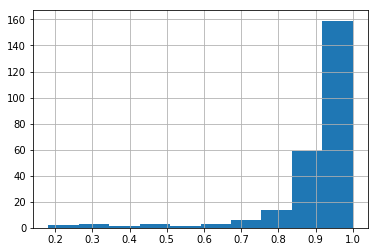

In [41]:
ts116[ts116["party"]=="R"]["agree_pct"].hist()

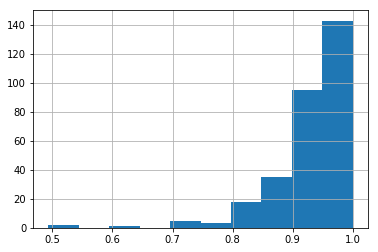

In [45]:
ts115[ts115["party"]=="R"]["agree_pct"].hist()

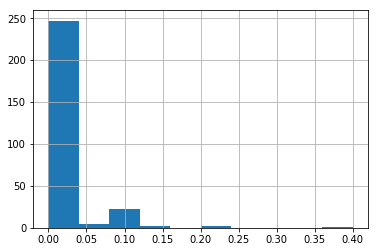

In [42]:
ts116[ts116["party"]=="D"]["agree_pct"].hist()

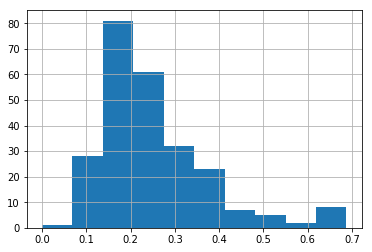

In [46]:
ts115[ts115["party"]=="D"]["agree_pct"].hist()